<a href="https://colab.research.google.com/github/m-shilpa/ethereum-data-analysis/blob/master/Malicious_Address_Prediction/data_analytics_malicious_categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

**column 'label' has values 1 - malicious , 0 - non-malicious**

In [ ]:
df = pd.read_csv('./malicious_prediction_data1.csv')

In [ ]:
df = df[['address','comment','no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved','label']]


In [ ]:
non_m = df.loc[df['label'] == 0]
m = df.loc[df['label'] == 1]

In [ ]:
print(df.shape)
print(non_m.shape)
print(m.shape)

(534, 17)
(267, 17)
(267, 17)


In [ ]:
upbit = df[df['comment'].str.contains("Upbit Hacker")]
upbit.shape

(111, 17)

In [ ]:
fake = df[df['comment'].str.contains("Fake")]
fake.shape

(70, 17)

In [ ]:
phish = df[df['comment'].str.contains("Phish")]
phish = phish.append(df[df['comment'].str.contains("phish")])
phish.shape

(42, 17)

In [ ]:
def plot_cate_hist(operation=None,upbit_bool=False,fake_bool=False,phish_bool=False):
  # bins = numpy.linspace(-10, 10, 100)
  attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']

  
  k =0
  j=0
  if operation == None:   
    for i in range(8):
      j=0
      l=k
      if len(attributes)-l < 2:
        fig,axs = plt.subplots(1,len(attributes)-l,figsize=(15,5))
        
      else:
        fig, axs = plt.subplots(1,2,figsize=(15,5))
      for attr in attributes[l:l+2]:
      
        k+=1
        axs[j].hist(non_m[attr],  alpha=0.5, label='non_malicious')
        if upbit_bool:
          axs[j].hist(upbit[attr],  alpha=0.5, label='upbit')
        if fake_bool:
          axs[j].hist(fake[attr],  alpha=0.5, label='fake')
        if phish_bool:
          axs[j].hist(phish[attr],  alpha=0.5, label='phish')
        axs[j].legend(loc='upper right')
        axs[j].set_title(attr)
        if i==0:
          fig.suptitle('Histogram of the data', fontsize=20)
        j+=1
  else:
    for i in range(8):
      j=0
      l=k
      if len(attributes)-l < 2:
        fig,axs = plt.subplots(1,len(attributes)-l,figsize=(15,5))
        
      else:
        fig, axs = plt.subplots(1,2,figsize=(15,5))
      for attr in attributes[l:l+2]:
        k+=1
        axs[j].hist(operation(non_m[attr]),  alpha=0.5, label='non_malicious')
        if upbit_bool:
          axs[j].hist(operation(upbit[attr]),  alpha=0.5, label='upbit')
        if fake_bool:
          axs[j].hist(operation(fake[attr]),  alpha=0.5, label='fake')
        if phish_bool:
          axs[j].hist(operation(phish[attr]),  alpha=0.5, label='phish')
        axs[j].legend(loc='upper right')
        axs[j].set_title(attr)
        if i==0:
          fig.suptitle(f'Histogram of the {operation}(data)', fontsize=20)
        j+=1
    


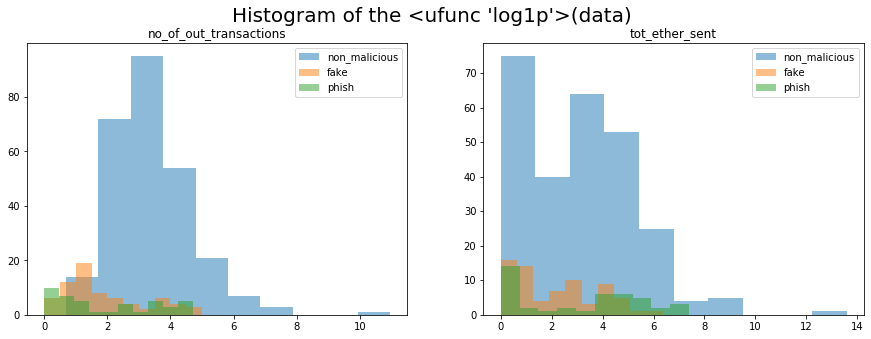

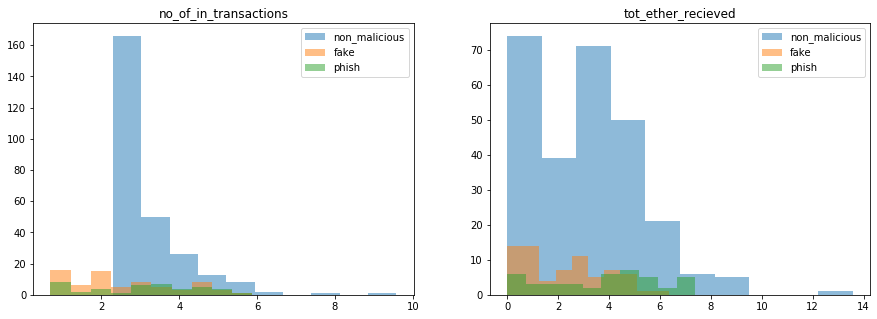

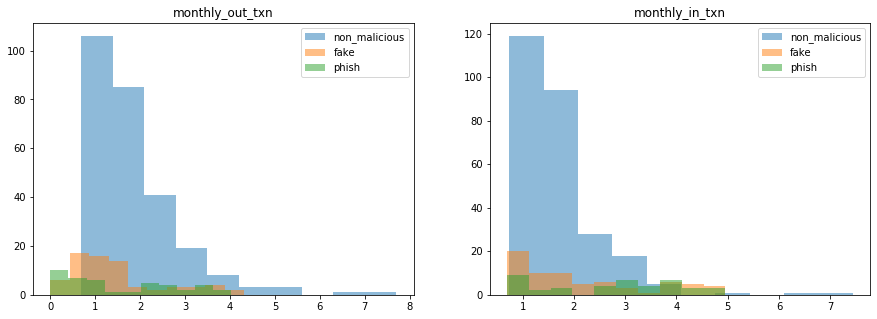

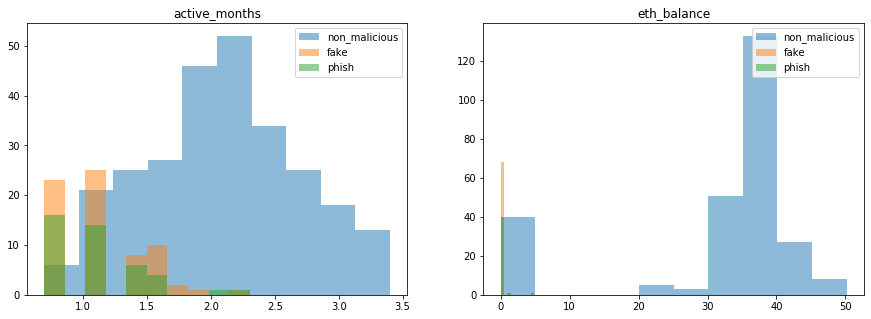

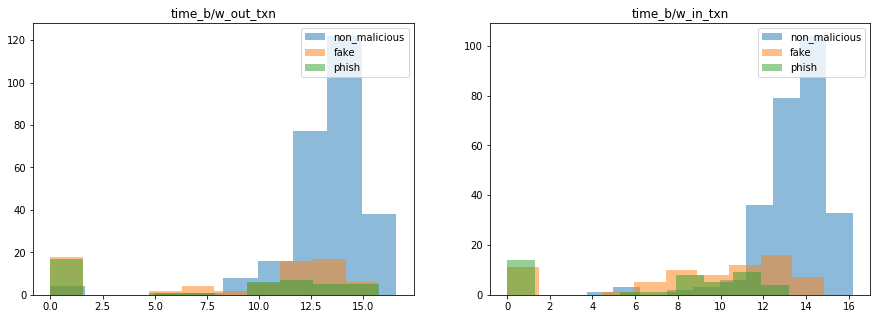

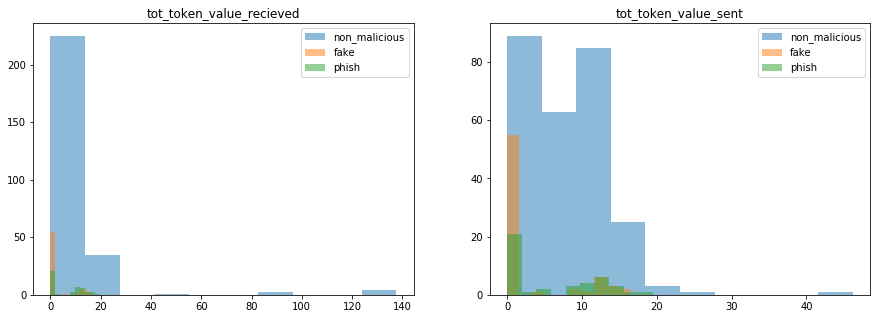

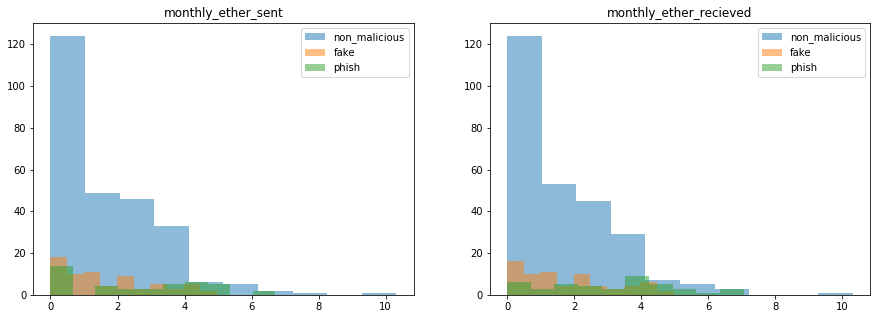

<Figure size 1080x360 with 0 Axes>

In [ ]:
plot_cate_hist(operation=np.log1p,upbit_bool=False,fake_bool=True,phish_bool=True)

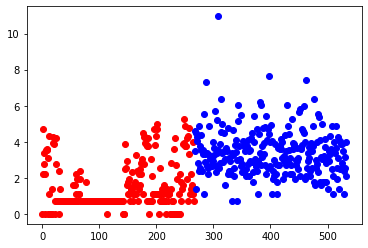

In [ ]:
plt.plot(np.log1p(m['no_of_out_transactions']),'o',color='red',label='malicious')
plt.plot(np.log1p(non_m['no_of_out_transactions']),'o',color='blue',label='non-malicious')

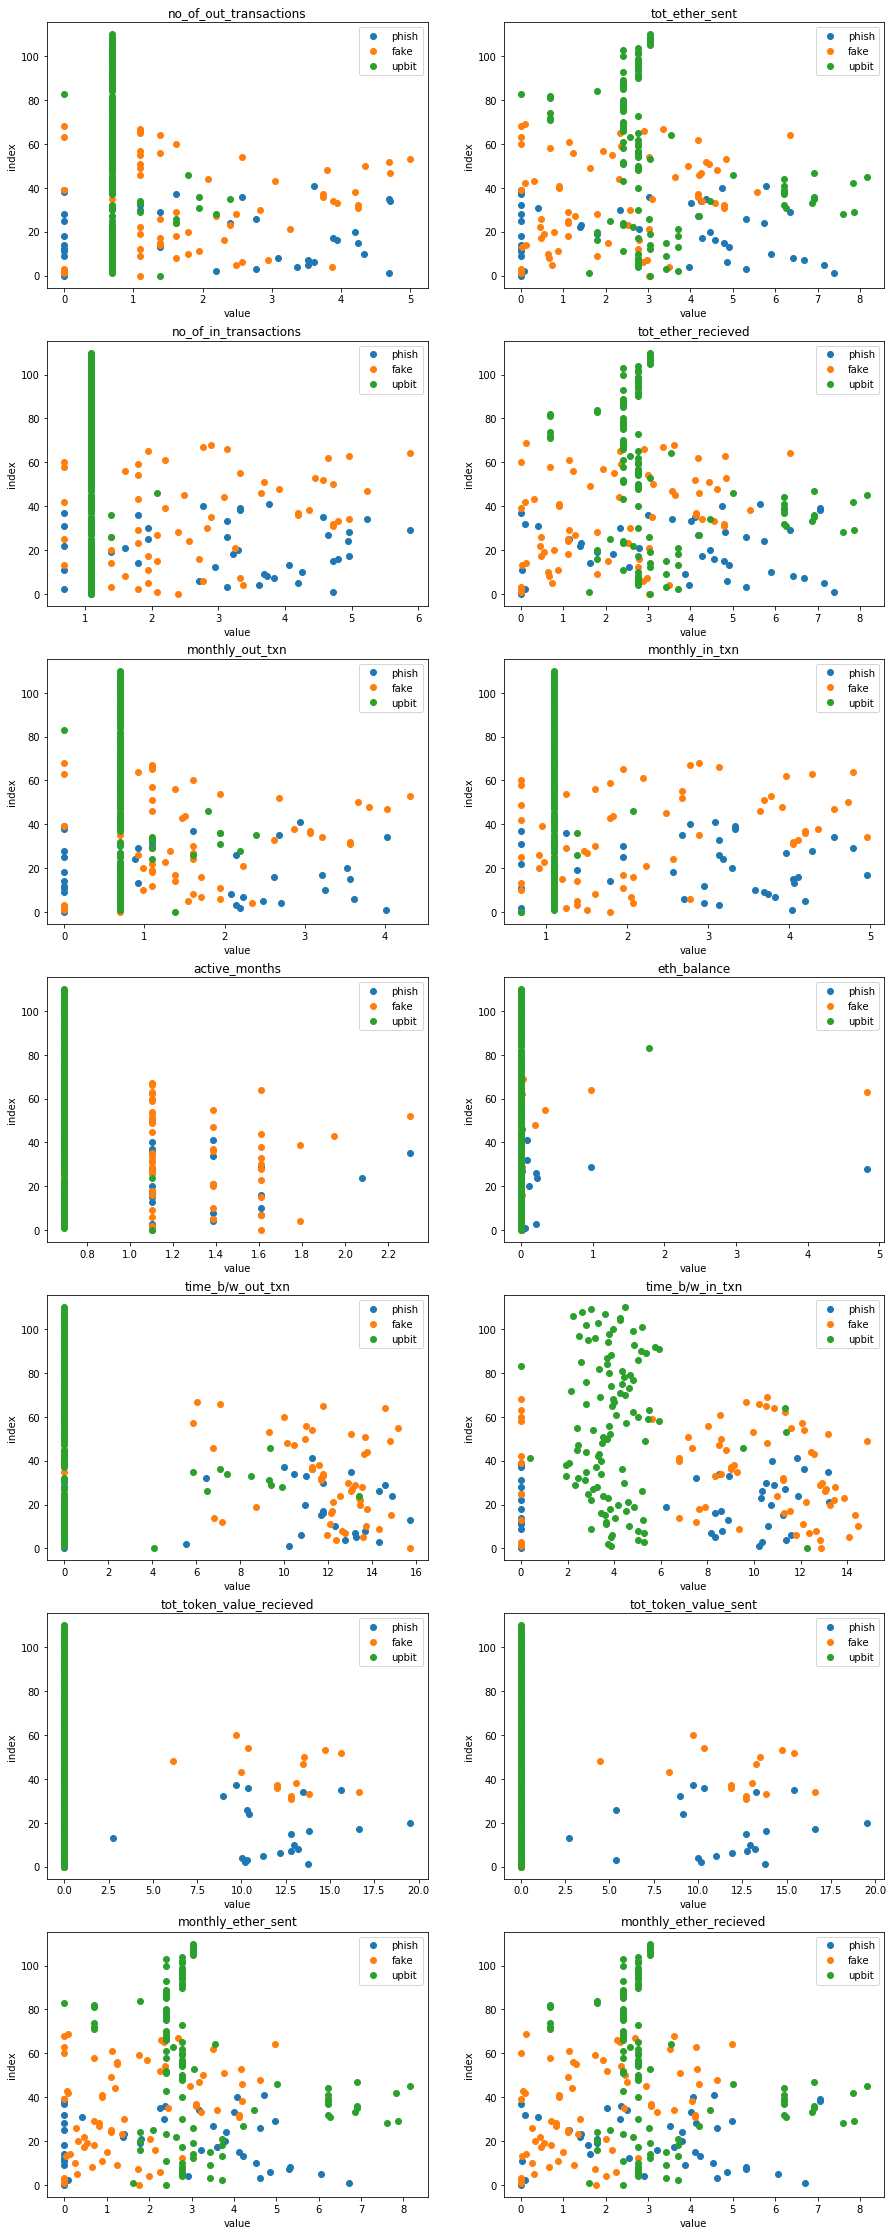

In [ ]:
# plot for addresses belonging to phishing,fake, upbit hack. Log of data is taken

attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']
fig, axs = plt.subplots(7,2,figsize=(15,40))
k=0
for i in range(7):
  for j in range(2): 
    # axs[i,j].plot(np.log1p(non_m[attributes[k]]),list(range(len(non_m))),'o',label='non-malicious')
    axs[i,j].plot(np.log1p(phish[attributes[k]]),list(range(len(phish))),'o',label='phish')
    axs[i,j].plot(np.log1p(fake[attributes[k]]),list(range(len(fake))),'o',label='fake')
    axs[i,j].plot(np.log1p(upbit[attributes[k]]),list(range(len(upbit))),'o',label='upbit')
   
    axs[i,j].legend(loc='upper right')
    axs[i,j].set_title(attributes[k])
    axs[i,j].set_xlabel('value')
    axs[i,j].set_ylabel('index')
    k+=1

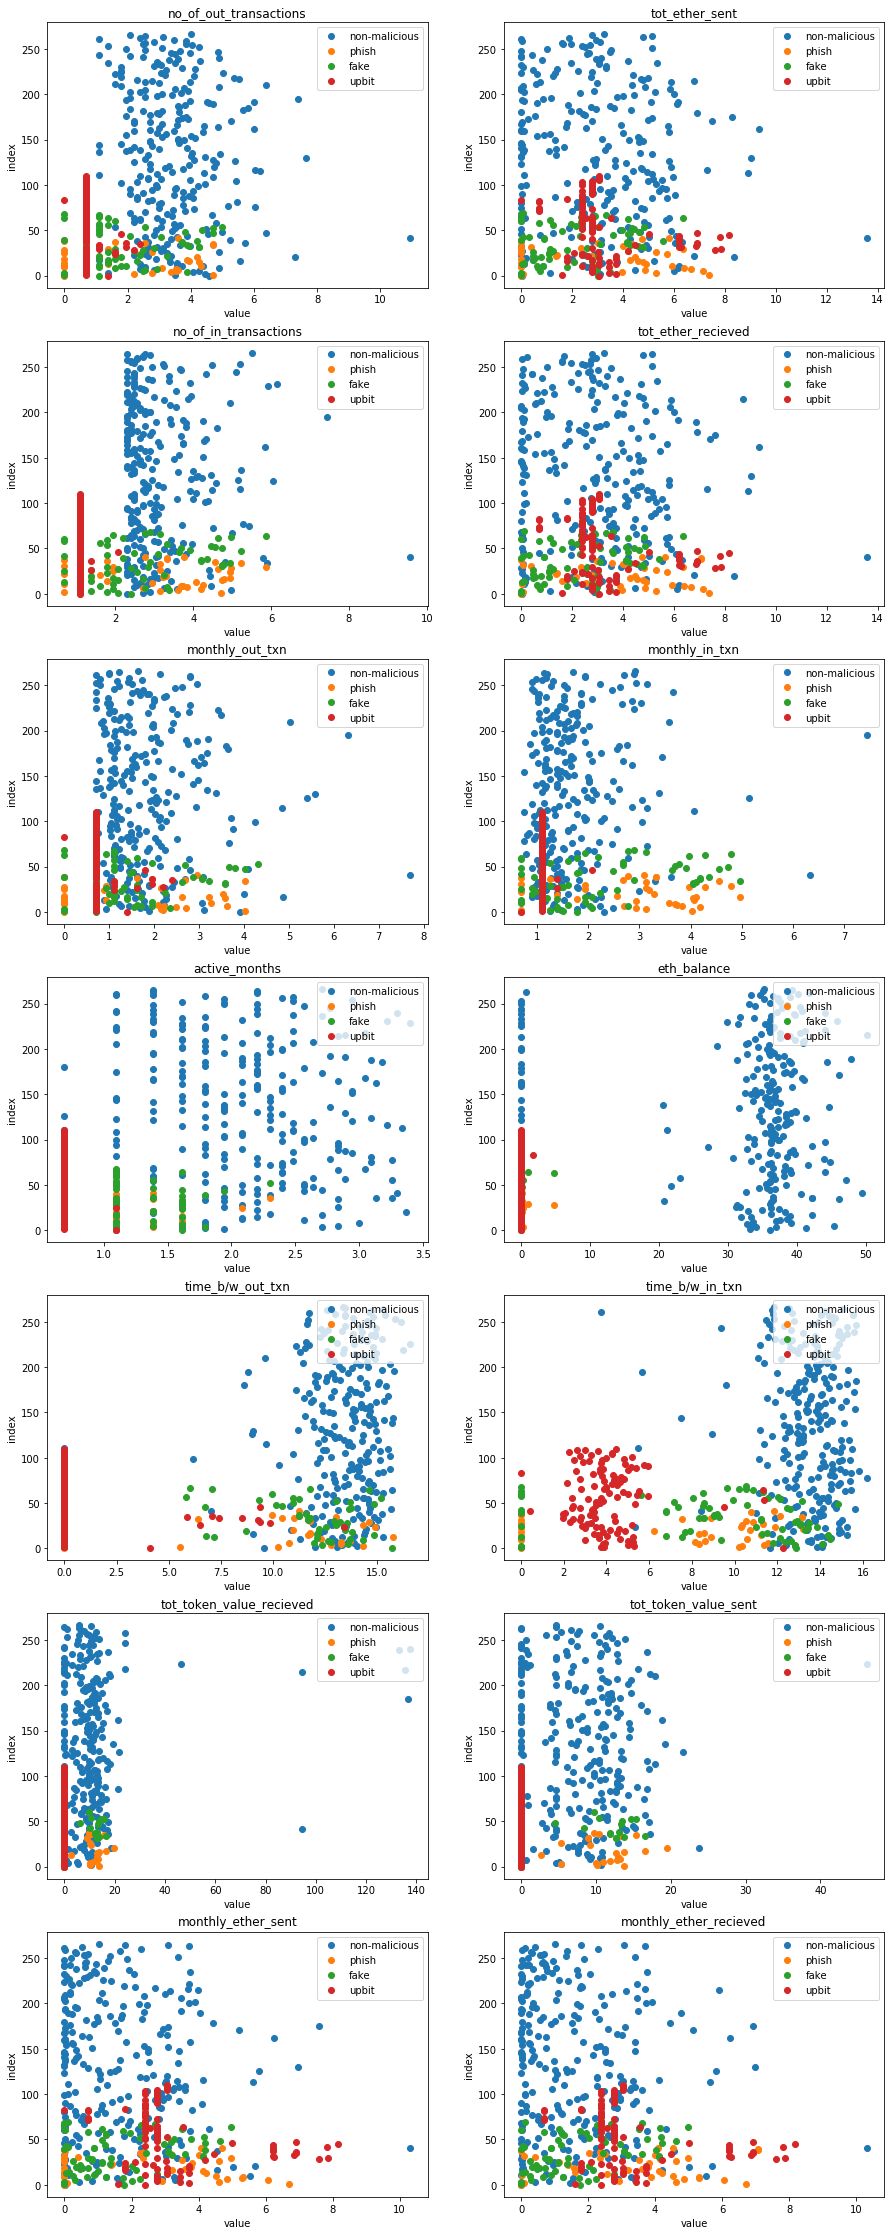

In [ ]:
# plot for addresses belonging to non-malicious, phishing, fake, upbit hack. Log of data is taken

attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']
fig, axs = plt.subplots(7,2,figsize=(15,40))
k=0
for i in range(7):
  for j in range(2): 
    axs[i,j].plot(np.log1p(non_m[attributes[k]]),list(range(len(non_m))),'o',label='non-malicious')
    axs[i,j].plot(np.log1p(phish[attributes[k]]),list(range(len(phish))),'o',label='phish')
    axs[i,j].plot(np.log1p(fake[attributes[k]]),list(range(len(fake))),'o',label='fake')
    axs[i,j].plot(np.log1p(upbit[attributes[k]]),list(range(len(upbit))),'o',label='upbit')
   
    axs[i,j].legend(loc='upper right')
    axs[i,j].set_title(attributes[k])
    axs[i,j].set_xlabel('value')
    axs[i,j].set_ylabel('index')
    k+=1

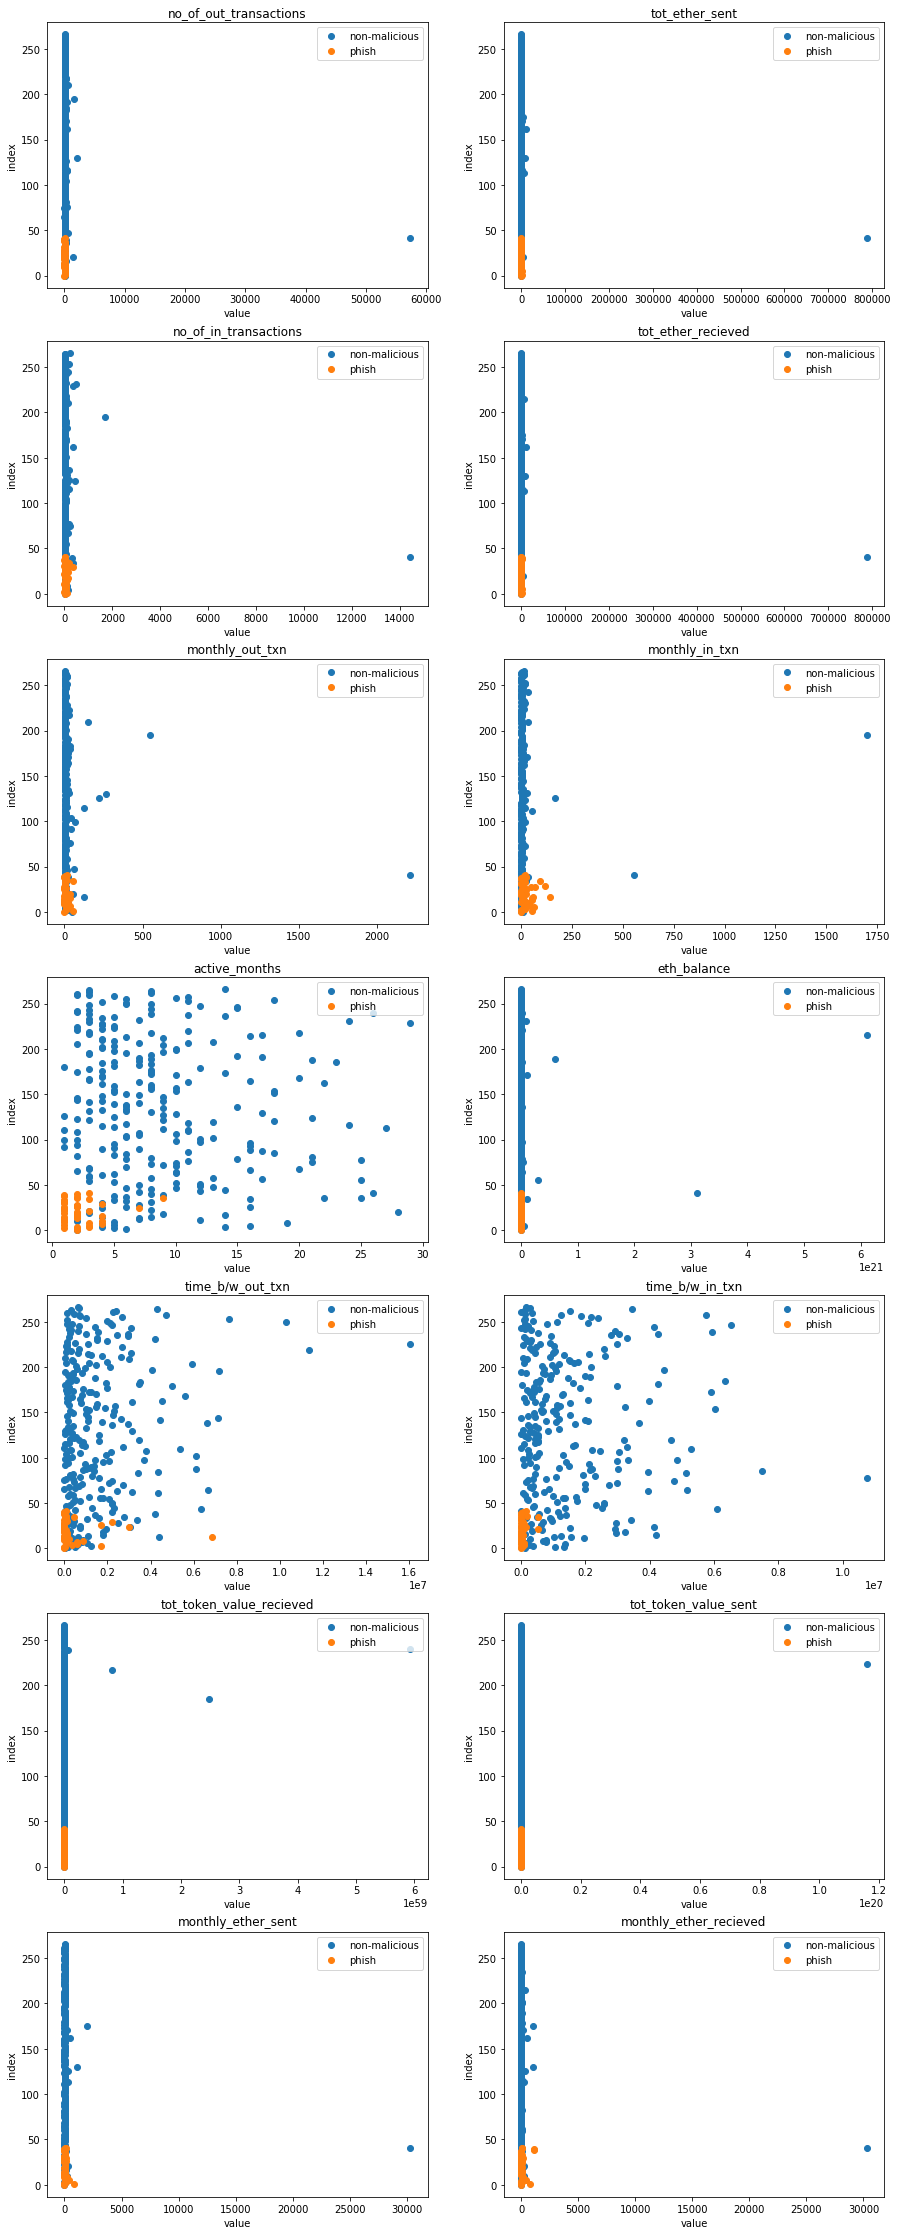

In [ ]:
# plot for addresses belonging to non-malicious, phishing.Plotted for the raw data without taking log

attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']
fig, axs = plt.subplots(7,2,figsize=(15,40))
k=0
for i in range(7):
  for j in range(2): 
    axs[i,j].plot(non_m[attributes[k]],list(range(len(non_m))),'o',label='non-malicious')
    axs[i,j].plot(phish[attributes[k]],list(range(len(phish))),'o',label='phish')
    # axs[i,j].plot(np.log1p(fake[attributes[k]]),list(range(len(fake))),'o',label='fake')
    # axs[i,j].plot(np.log1p(upbit[attributes[k]]),list(range(len(upbit))),'o',label='upbit')
   
    axs[i,j].legend(loc='upper right')
    axs[i,j].set_title(attributes[k])
    axs[i,j].set_xlabel('value')
    axs[i,j].set_ylabel('index')
    k+=1

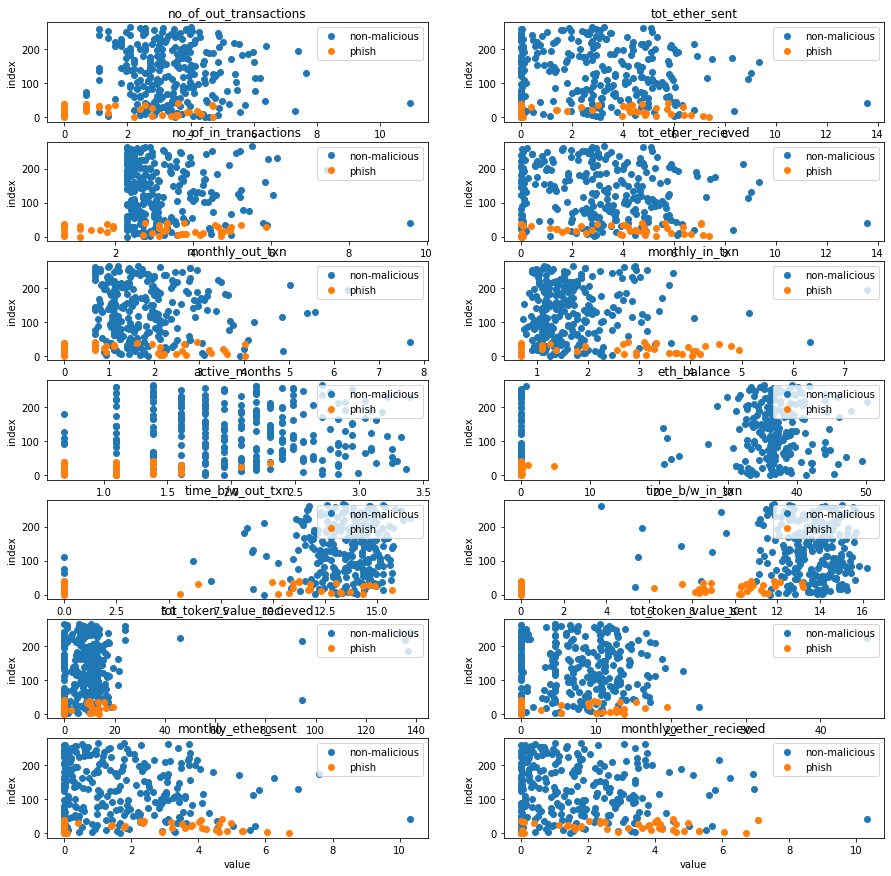

In [ ]:
# plot for addresses belonging to non-malicious, phishing. Log of data is taken

attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']
fig, axs = plt.subplots(7,2,figsize=(15,15))
k=0
for i in range(7):
  for j in range(2): 
    axs[i,j].plot(np.log1p(non_m[attributes[k]]),list(range(len(non_m))),'o',label='non-malicious')
    axs[i,j].plot(np.log1p(phish[attributes[k]]),list(range(len(phish))),'o',label='phish')
    # axs[i,j].plot(np.log1p(fake[attributes[k]]),list(range(len(fake))),'o',label='fake')
    # axs[i,j].plot(np.log1p(upbit[attributes[k]]),list(range(len(upbit))),'o',label='upbit')
   
    axs[i,j].legend(loc='upper right')
    axs[i,j].set_title(attributes[k])
    axs[i,j].set_xlabel('value')
    axs[i,j].set_ylabel('index')
    k+=1

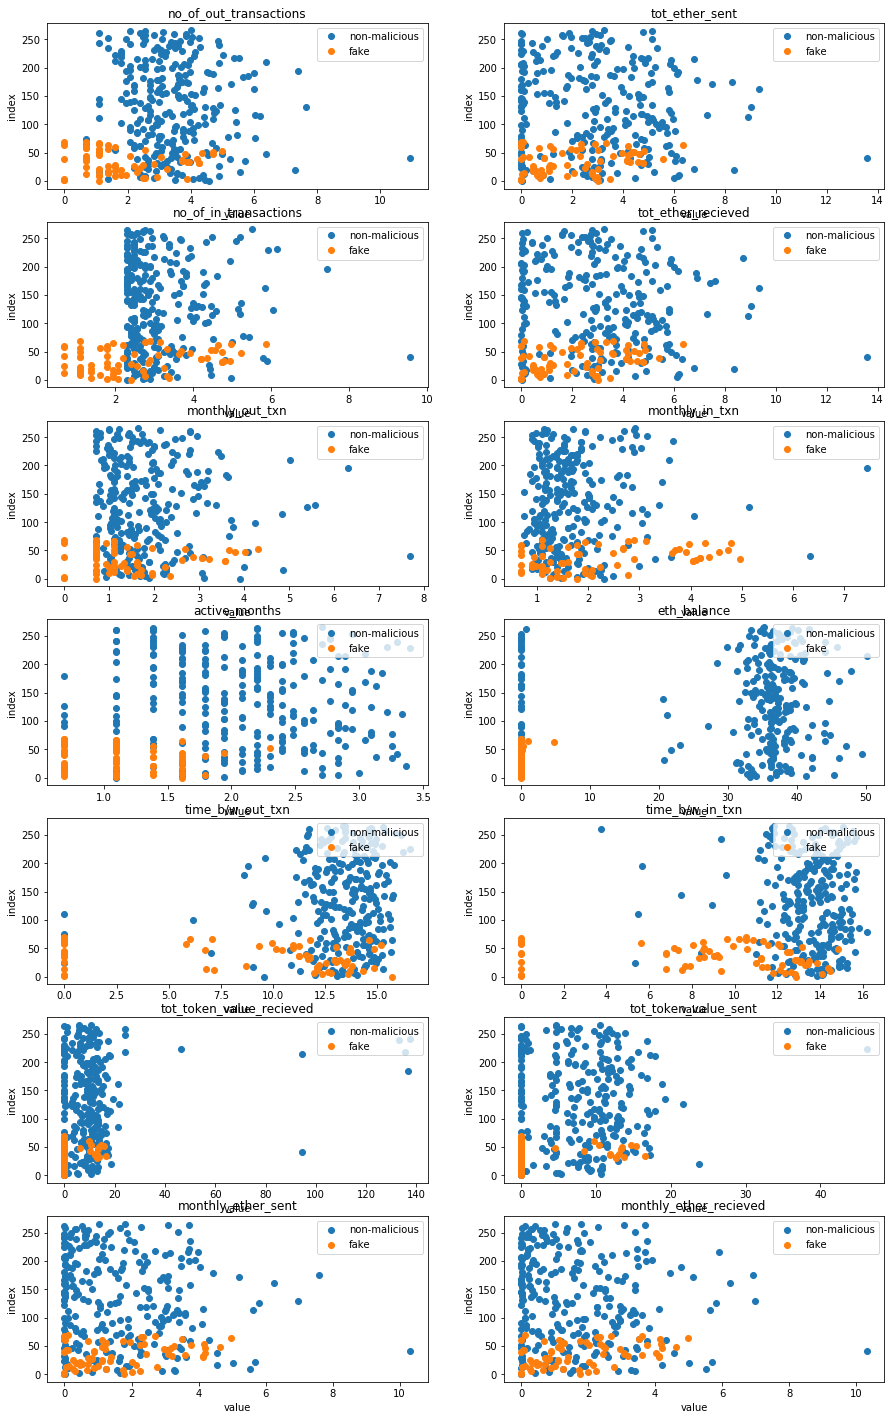

In [ ]:
# plot for addresses belonging to non-malicious, fake, upbit hack. Log of data is taken

attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']
fig, axs = plt.subplots(7,2,figsize=(15,25))
k=0
for i in range(7):
  for j in range(2): 
    axs[i,j].plot(np.log1p(non_m[attributes[k]]),list(range(len(non_m))),'o',label='non-malicious')
    # axs[i,j].plot(np.log1p(phish[attributes[k]]),list(range(len(phish))),'o',label='phish')
    axs[i,j].plot(np.log1p(fake[attributes[k]]),list(range(len(fake))),'o',label='fake')
    # axs[i,j].plot(np.log1p(upbit[attributes[k]]),list(range(len(upbit))),'o',label='upbit')
   
    axs[i,j].legend(loc='upper right')
    axs[i,j].set_title(attributes[k])
    axs[i,j].set_xlabel('value')
    axs[i,j].set_ylabel('index')
    k+=1

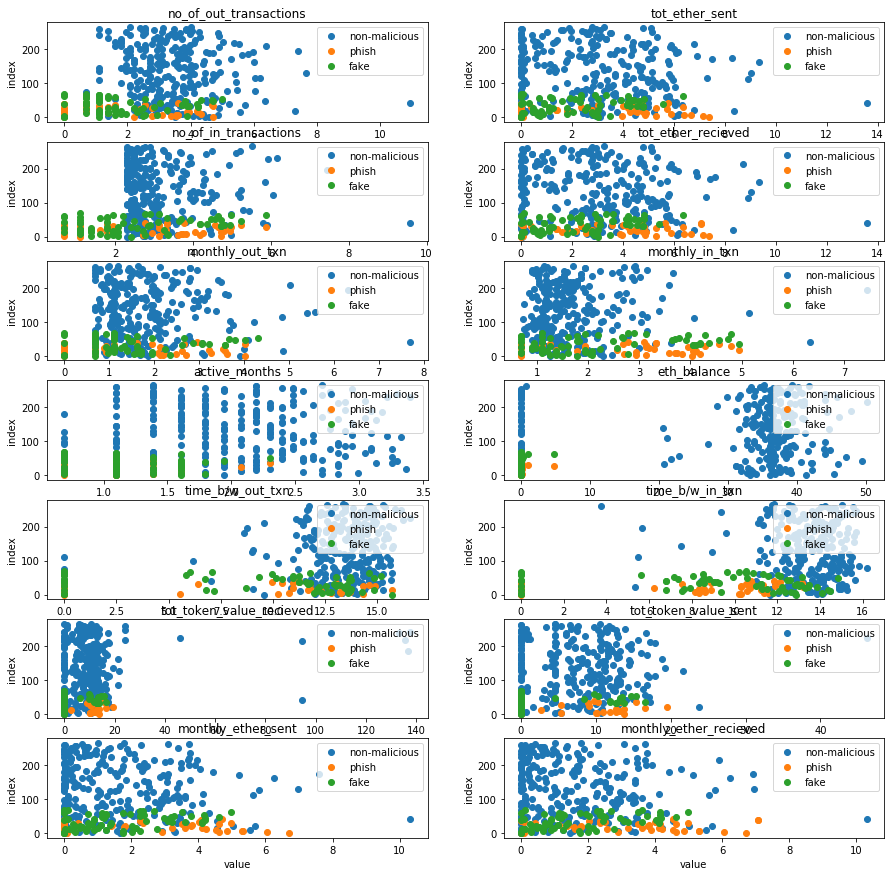

In [ ]:
# plot for addresses belonging to non-malicious, phishing, fake. Log of data is taken

attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']
fig, axs = plt.subplots(7,2,figsize=(15,15))
k=0
for i in range(7):
  for j in range(2): 
    axs[i,j].plot(np.log1p(non_m[attributes[k]]),list(range(len(non_m))),'o',label='non-malicious')
    axs[i,j].plot(np.log1p(phish[attributes[k]]),list(range(len(phish))),'o',label='phish')
    axs[i,j].plot(np.log1p(fake[attributes[k]]),list(range(len(fake))),'o',label='fake')
    # axs[i,j].plot(np.log1p(upbit[attributes[k]]),list(range(len(upbit))),'o',label='upbit')
   
    axs[i,j].legend(loc='upper right')
    axs[i,j].set_title(attributes[k])
    axs[i,j].set_xlabel('value')
    axs[i,j].set_ylabel('index')
    k+=1

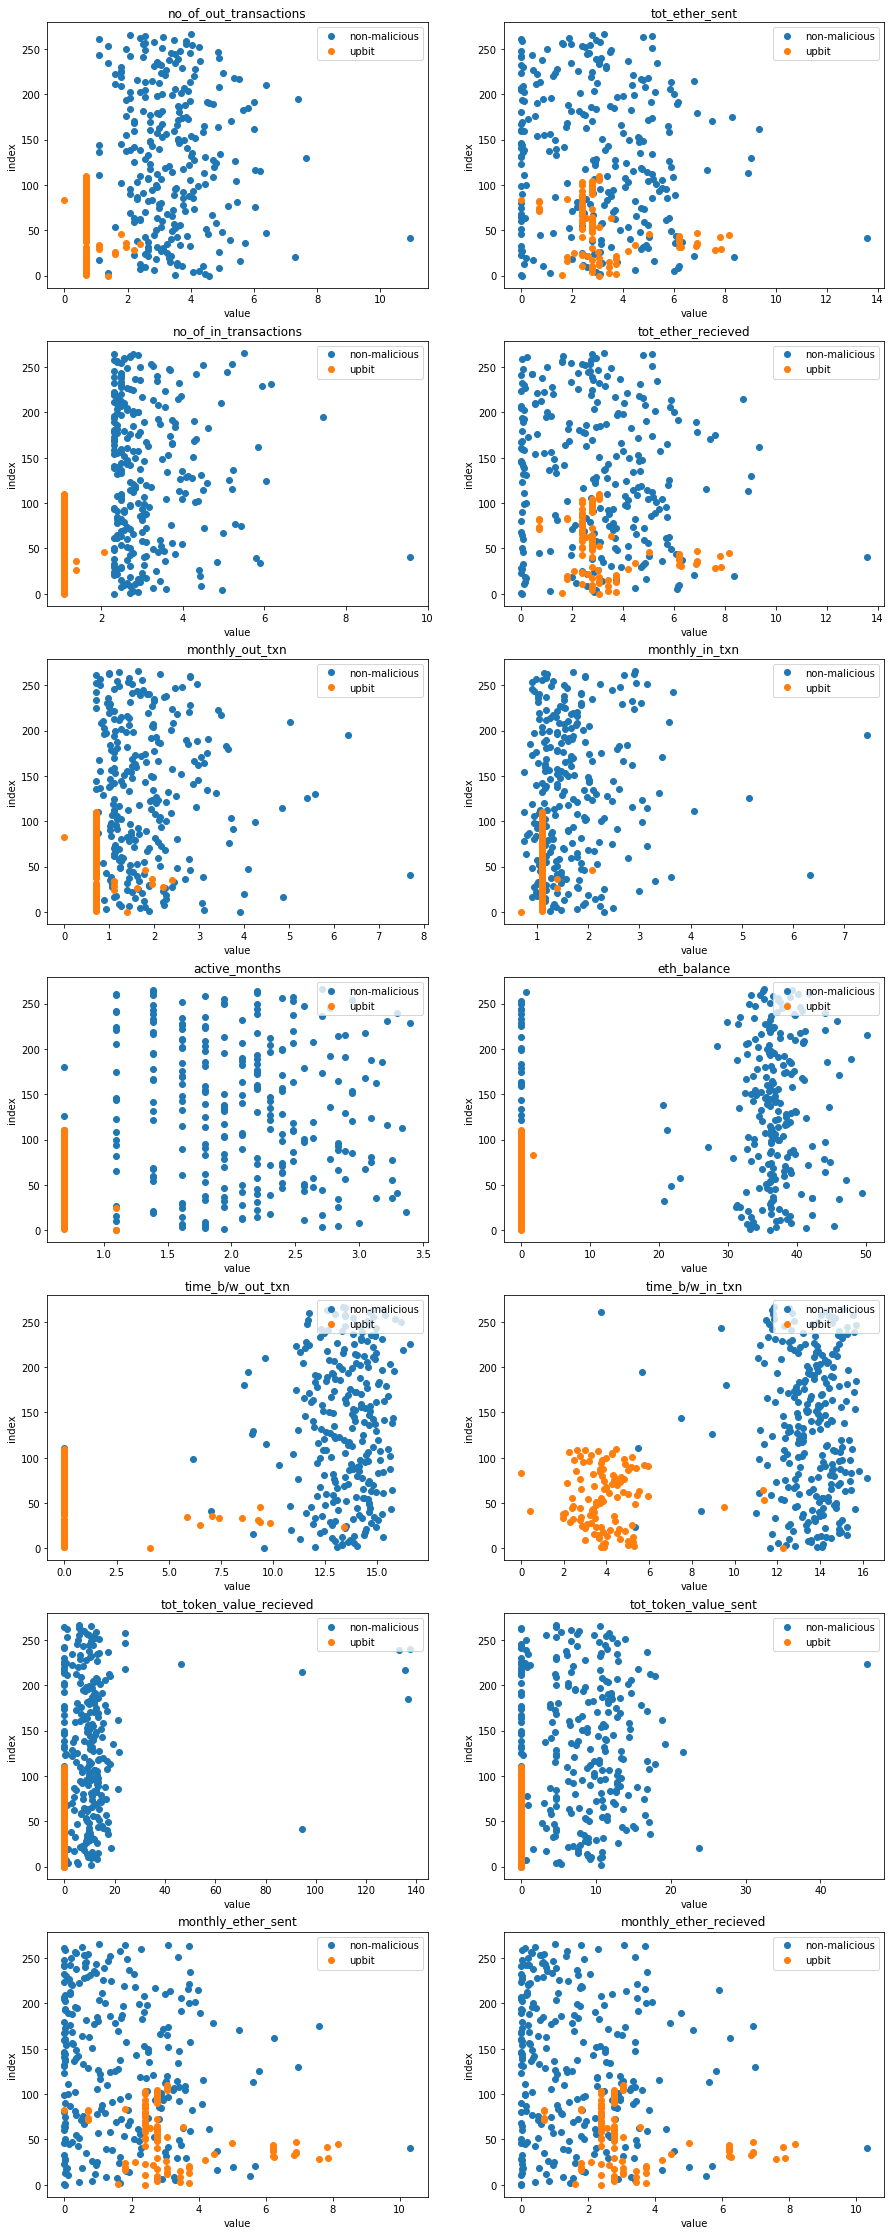

In [ ]:
# plot for addresses belonging to non-malicious, upbit hack. Log of data is taken

attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']
fig, axs = plt.subplots(7,2,figsize=(15,40))
k=0
for i in range(7):
  for j in range(2): 
    axs[i,j].plot(np.log1p(non_m[attributes[k]]),list(range(len(non_m))),'o',label='non-malicious')
#     axs[i,j].plot(np.log1p(phish[attributes[k]]),list(range(len(phish))),'o',label='phish')
#     axs[i,j].plot(np.log1p(fake[attributes[k]]),list(range(len(fake))),'o',label='fake')
    axs[i,j].plot(np.log1p(upbit[attributes[k]]),list(range(len(upbit))),'o',label='upbit')
   
    axs[i,j].legend(loc='upper right')
    axs[i,j].set_title(attributes[k])
    axs[i,j].set_xlabel('value')
    axs[i,j].set_ylabel('index')
    k+=1

In [ ]:
(upbit['tot_ether_recieved']).value_counts()

15.000252    6
10.000273    6
15.000421    5
15.000483    4
15.000378    4
            ..
15.000441    1
33.829017    1
30.000421    1
5.000000     1
10.000000    1
Name: tot_ether_recieved, Length: 70, dtype: int64

In [ ]:
np.log1p(upbit['tot_ether_recieved']).value_counts()

2.772604    6
2.397920    6
2.772615    5
2.772612    4
2.772619    4
           ..
3.044538    1
0.693357    1
8.160803    1
6.216604    1
3.713580    1
Name: tot_ether_recieved, Length: 70, dtype: int64

In [ ]:
(upbit['tot_ether_sent']).value_counts()

15.000001      31
10.000000      26
20.000000       9
500.000010      5
1.000000        5
40.000000       4
30.000001       3
5.000000        3
1999.998070     1
999.998613      1
33.828993       1
148.898081      1
499.998673      1
2607.128195     1
999.994953      1
20.099937       1
12.000000       1
14.999958       1
1004.905144     1
7.112098        1
19.998740       1
86.199539       1
19.579153       1
954.099544      1
12.981130       1
3499.996657     1
4.000000        1
9.999503        1
524.362725      1
65.998612       1
14.999937       1
2499.993471     1
0.000000        1
Name: tot_ether_sent, dtype: int64

In [ ]:
np.log1p(upbit['tot_ether_sent']).value_counts()

2.772589    31
2.397895    26
3.044522     9
0.693147     5
6.216606     5
3.713572     4
1.791759     3
3.433987     3
3.550450     1
6.908750     1
6.216603     1
2.397850     1
4.468199     1
2.093357     1
5.009956     1
1.609438     1
7.866388     1
0.000000     1
6.264089     1
8.160803     1
6.861816     1
2.637709     1
6.913643     1
6.908753     1
3.024279     1
7.601401     1
3.044462     1
3.049270     1
2.772585     1
7.824443     1
2.564949     1
2.772586     1
4.204672     1
Name: tot_ether_sent, dtype: int64

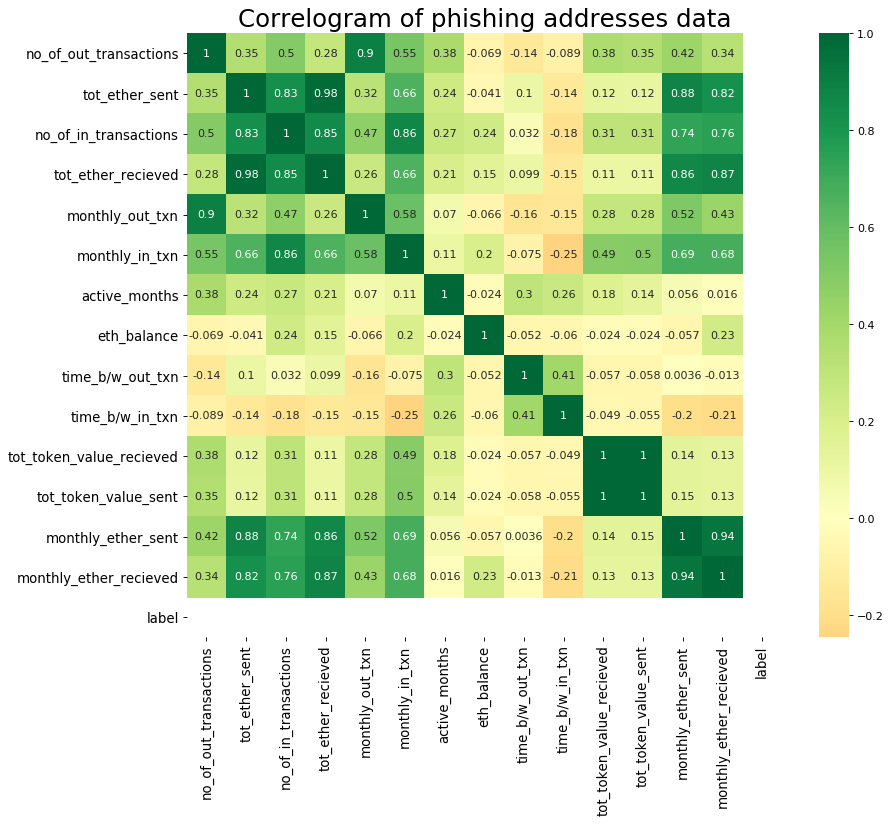

In [ ]:
data = fake.loc[:,'no_of_out_transactions':].copy()

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of phishing addresses data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Value counts for non-malicious addresses**

In [ ]:
non_m['active_months'].value_counts()

4     27
3     25
5     25
8     24
2     21
6     21
7     16
10    15
9     12
11    11
16     9
12     8
1      6
14     6
13     5
15     5
17     5
18     5
21     4
20     3
25     3
22     2
24     2
26     2
28     1
19     1
23     1
27     1
29     1
Name: active_months, dtype: int64

**Value counts for addresses belonging to fake category**

In [ ]:
fake['active_months'].value_counts()

2    25
1    23
4    10
3     8
5     2
9     1
6     1
Name: active_months, dtype: int64

Text(0, 0.5, 'index')

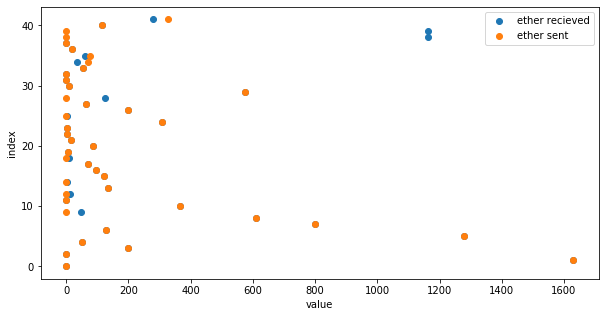

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(10,5))
axs.plot((phish['tot_ether_recieved']),list(range(len(phish))),'o',label='ether recieved')
axs.plot((phish['tot_ether_sent']),list(range(len(phish))),'o',label='ether sent')

axs.legend(loc='upper right')
axs.set_xlabel('value')
axs.set_ylabel('index')

In [ ]:
print(sum(phish['tot_ether_sent']))
print(sum(phish['tot_ether_recieved']))
print(np.mean(phish['tot_ether_sent']))
print(np.mean(phish['tot_ether_recieved']))

7417.224624669474
9842.755869399762
176.60058630165415
234.35133022380384


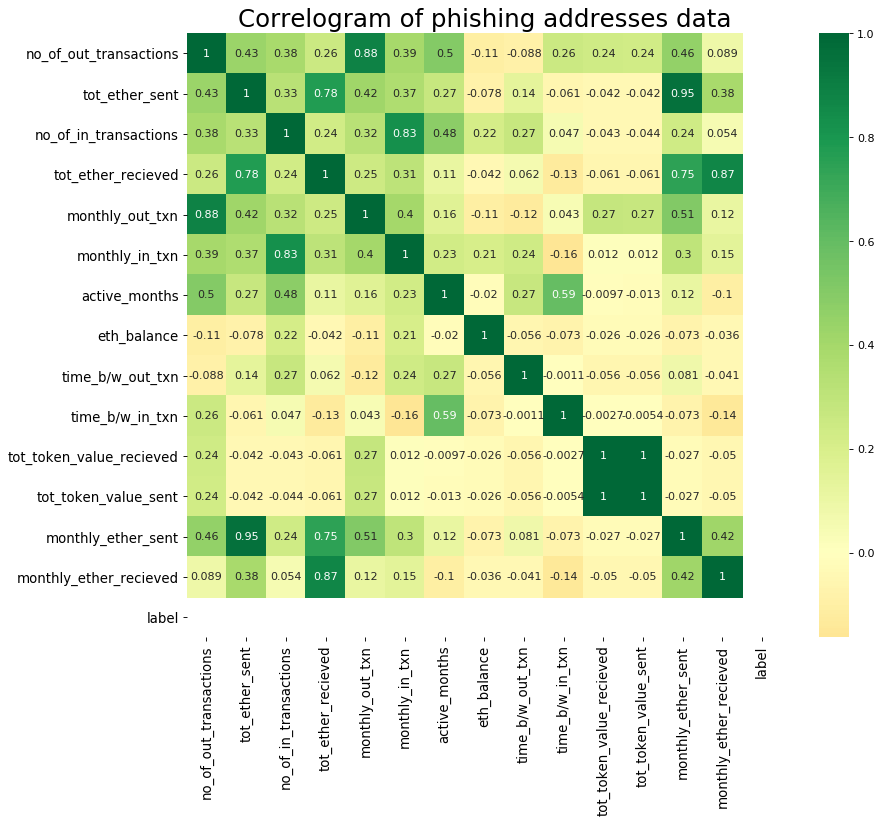

In [ ]:
data = phish.loc[:,'no_of_out_transactions':].copy()

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of phishing addresses data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

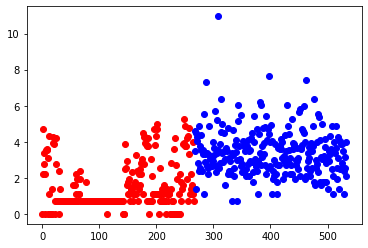

In [ ]:
plt.plot(np.log1p(m['no_of_out_transactions']),'o',color='red',label='malicious')
plt.plot(np.log1p(non_m['no_of_out_transactions']),'o',color='blue',label='non-malicious')

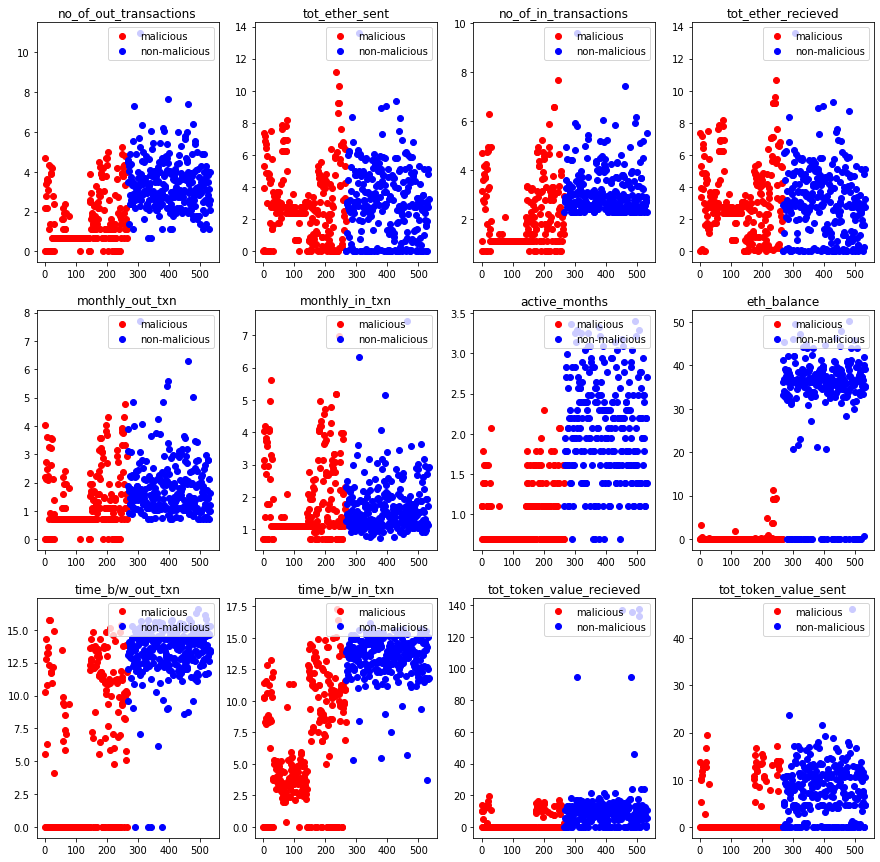

In [ ]:
attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']
fig, axs = plt.subplots(3,4,figsize=(15,15))
k=0
for i in range(3):
  for j in range(4):
    axs[i,j].plot(np.log1p(m[attributes[k]]),'o',color='red',label='malicious')
    axs[i,j].plot(np.log1p(non_m[attributes[k]]),'o',color='blue',label='non-malicious')
    axs[i,j].legend(loc='upper right')
    axs[i,j].set_title(attributes[k])
    k+=1

In [ ]:
attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']
for i in attributes:
    print(i,fake[i].value_counts())


no_of_out_transactions 2.0      13
1.0      12
0.0       6
3.0       6
4.0       5
11.0      2
12.0      2
41.0      2
5.0       2
69.0      2
25.0      1
47.0      1
18.0      1
6.0       1
9.0       1
148.0     1
108.0     1
8.0       1
16.0      1
51.0      1
48.0      1
66.0      1
20.0      1
7.0       1
110.0     1
44.0      1
76.0      1
10.0      1
Name: no_of_out_transactions, dtype: int64
tot_ether_sent 0.000000      6
1.438823      2
120.822386    2
63.584920     2
0.933952      1
             ..
77.355305     1
50.852857     1
14.999000     1
7.491634      1
0.031683      1
Name: tot_ether_sent, Length: 62, dtype: int64
no_of_in_transactions 2      11
5       6
1       5
3       4
6       4
112     3
7       3
10      2
15      2
27      2
8       2
65      2
4       2
17      2
11      1
12      1
141     1
16      1
14      1
120     1
22      1
25      1
28      1
37      1
39      1
49      1
187     1
77      1
85      1
95      1
356     1
103     1
142     1
21      

In [ ]:
(m['no_of_out_transactions']).apply(np.ceil).value_counts()


1.0      123
2.0       26
0.0       25
3.0       11
4.0        9
8.0        7
6.0        5
5.0        4
48.0       3
10.0       3
69.0       3
66.0       3
15.0       3
20.0       2
41.0       2
12.0       2
16.0       2
51.0       2
36.0       2
33.0       2
11.0       2
47.0       1
75.0       1
21.0       1
28.0       1
109.0      1
54.0       1
27.0       1
9.0        1
119.0      1
74.0       1
67.0       1
43.0       1
42.0       1
130.0      1
190.0      1
49.0       1
14.0       1
148.0      1
108.0      1
76.0       1
44.0       1
110.0      1
7.0        1
90.0       1
25.0       1
18.0       1
Name: no_of_out_transactions, dtype: int64

In [ ]:
(non_m['no_of_out_transactions']).apply(np.ceil).value_counts()

12.0     11
7.0       9
13.0      8
8.0       8
18.0      8
         ..
62.0      1
127.0     1
83.0      1
196.0     1
33.0      1
Name: no_of_out_transactions, Length: 109, dtype: int64

In [ ]:
print(non_m['no_of_out_transactions'].mode())
# print(m.mode(axis=1))

0    12.0
dtype: float64


In [ ]:
def plot_hist(operation=None):
  # bins = numpy.linspace(-10, 10, 100)
  attributes  = ['no_of_out_transactions', 'tot_ether_sent','no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
                'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn','time_b/w_in_txn', 'tot_token_value_recieved',
                'tot_token_value_sent','monthly_ether_sent', 'monthly_ether_recieved']

  
  k =0
  j=0
  if operation == None:   
    for i in range(4):
      j=0
      l=k
      if len(attributes)-l < 4:
        fig,axs = plt.subplots(1,len(attributes)-l,figsize=(15,5))
        
      else:
        fig, axs = plt.subplots(1,4,figsize=(15,5))
      for attr in attributes[l:l+4]:
      
        k+=1
        axs[j].hist(non_m[attr],  alpha=0.5, label='non_malicious')
        axs[j].hist(m[attr],  alpha=0.5, label='malicious')
        axs[j].legend(loc='upper right')
        axs[j].set_title(attr)
        if i==0:
          fig.suptitle('Histogram of the data', fontsize=20)
        j+=1
  else:
    for i in range(4):
      j=0
      l=k
      if len(attributes)-l < 4:
        fig,axs = plt.subplots(1,len(attributes)-l,figsize=(15,5))
        
      else:
        fig, axs = plt.subplots(1,4,figsize=(15,5))
      for attr in attributes[l:l+4]:
        k+=1
        axs[j].hist(operation(non_m[attr]),  alpha=0.5, label='non_malicious')
        axs[j].hist(operation(m[attr]),  alpha=0.5, label='malicious')
        axs[j].legend(loc='upper right')
        axs[j].set_title(attr)
        if i==0:
          fig.suptitle(f'Histogram of the {operation}(data)', fontsize=20)
        j+=1
    


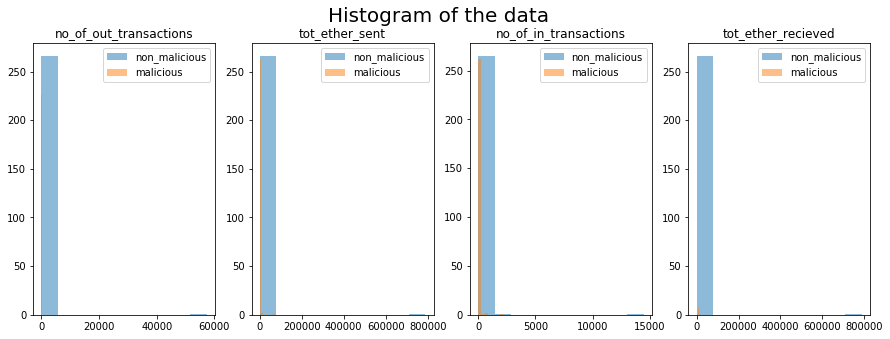

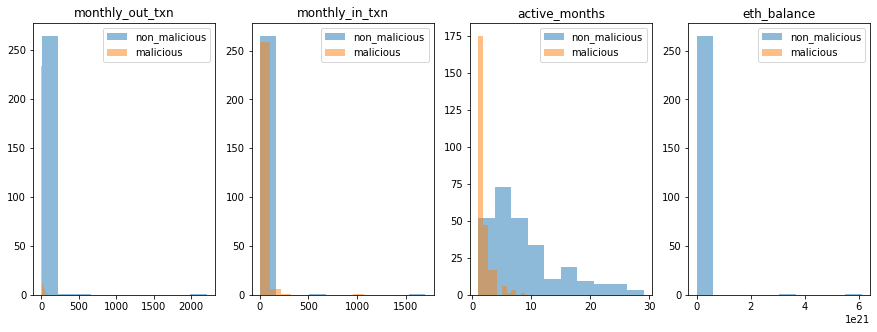

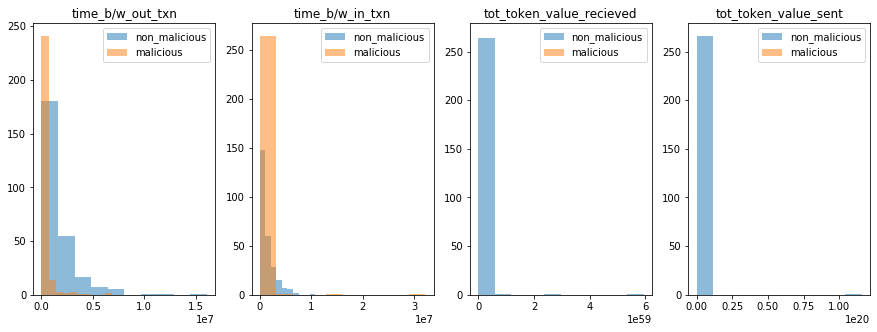

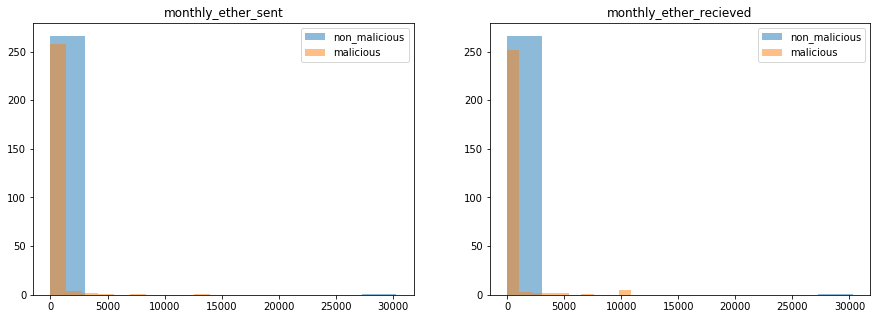

In [ ]:
plot_hist()

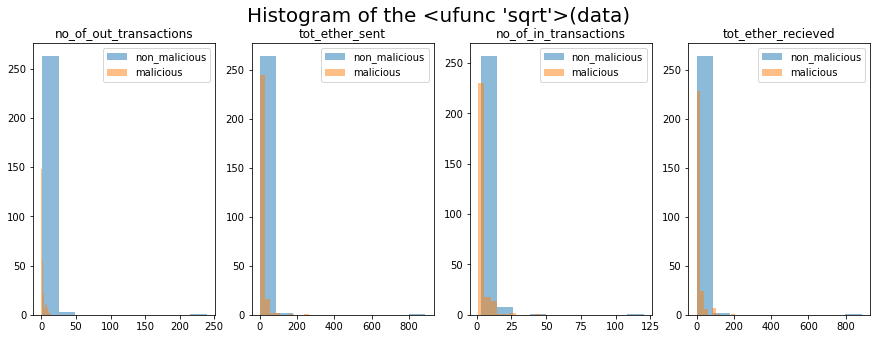

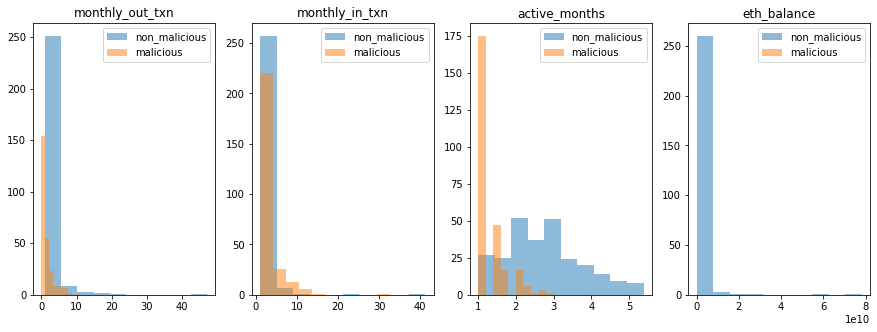

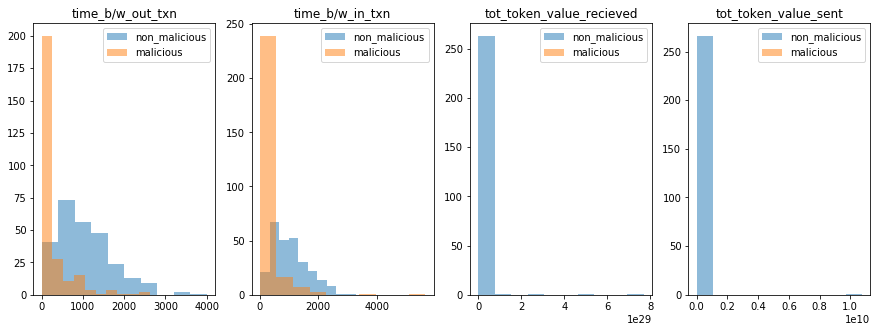

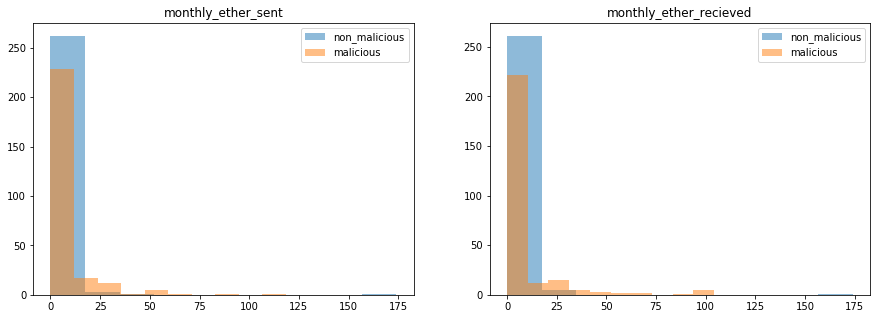

In [ ]:
plot_hist(operation=np.sqrt)

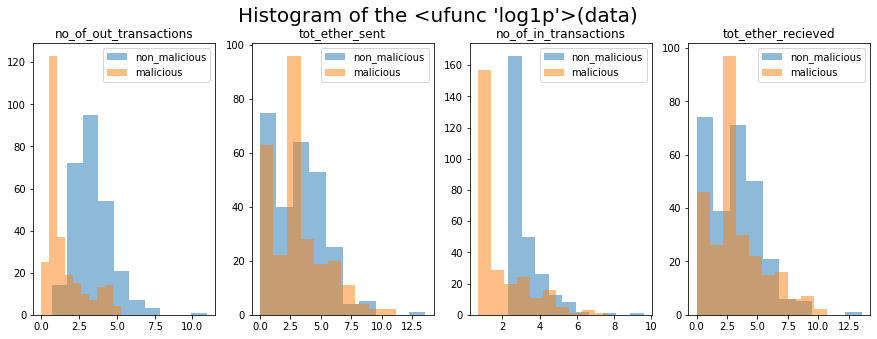

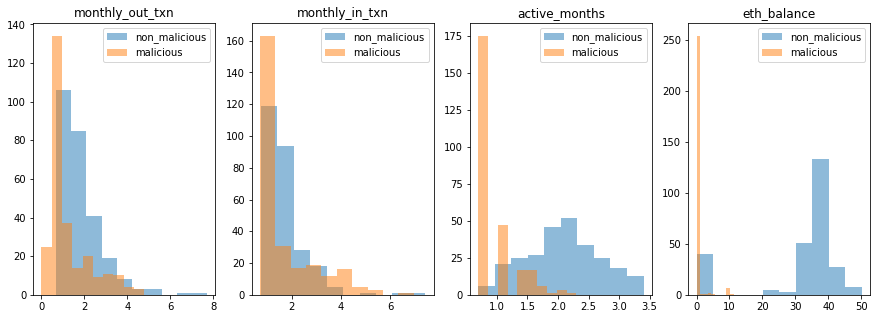

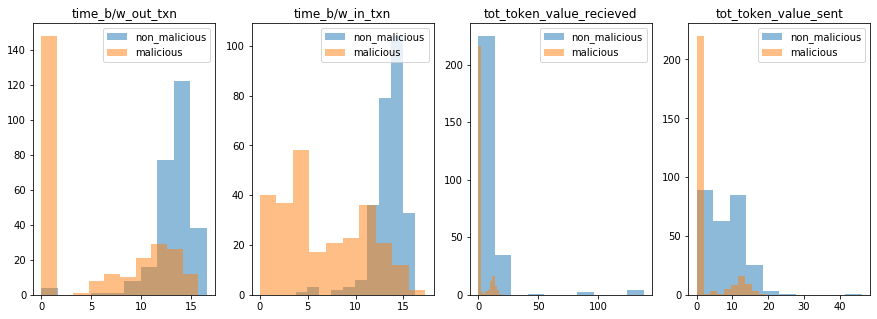

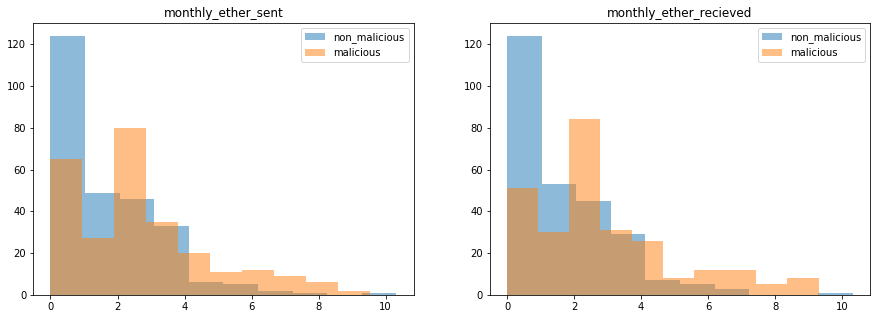

In [ ]:
plot_hist(operation=np.log1p)

In [ ]:
data = df.loc[:,'no_of_out_transactions':].copy()

Feature density plot for the labels in the data


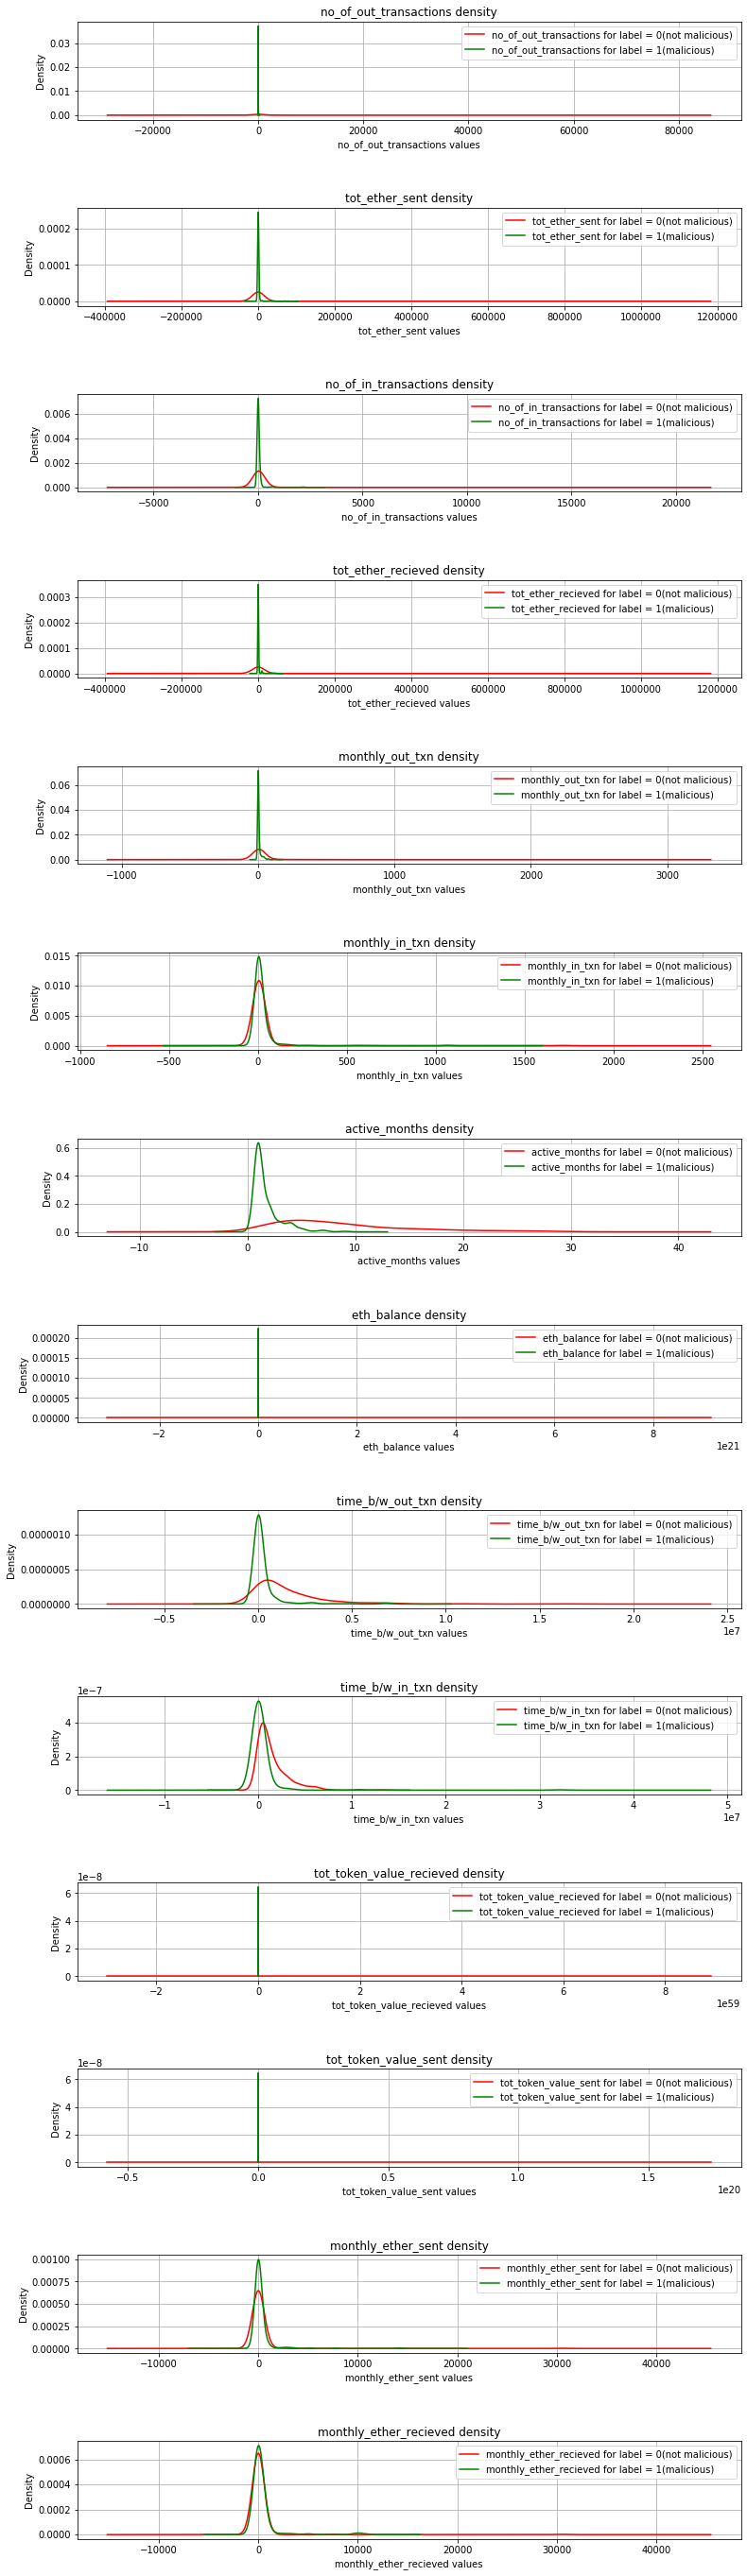

In [ ]:
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt


def plot_densities(data,names):
    '''
    Plot features densities depending on the label values
    '''
    # change fig size to fit all subplots beautifully 
    rcParams['figure.figsize'] = 15, 20

    # separate data based on label values 
    label_0 = data[data['label'] == 0]
    label_1 = data[data['label'] == 1]

    # init figure
    fig, axs = plt.subplots(14, 1)
    
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 1.95,
                        wspace = 0.2, hspace = 0.9)

    print('Feature density plot for the labels in the data')
    # plot densities for labels
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        label_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + ' for label = 0(not malicious)')
        label_1[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="green", legend=True,
                                     label=column_name + ' for label = 1(malicious)')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
        
    plt.show()
    fig.savefig('densities.png')

# load your data 
names = list(data.columns)
# plot correlation & densities
plot_densities(data,names)

Feature density plot for the labels in the log(data)


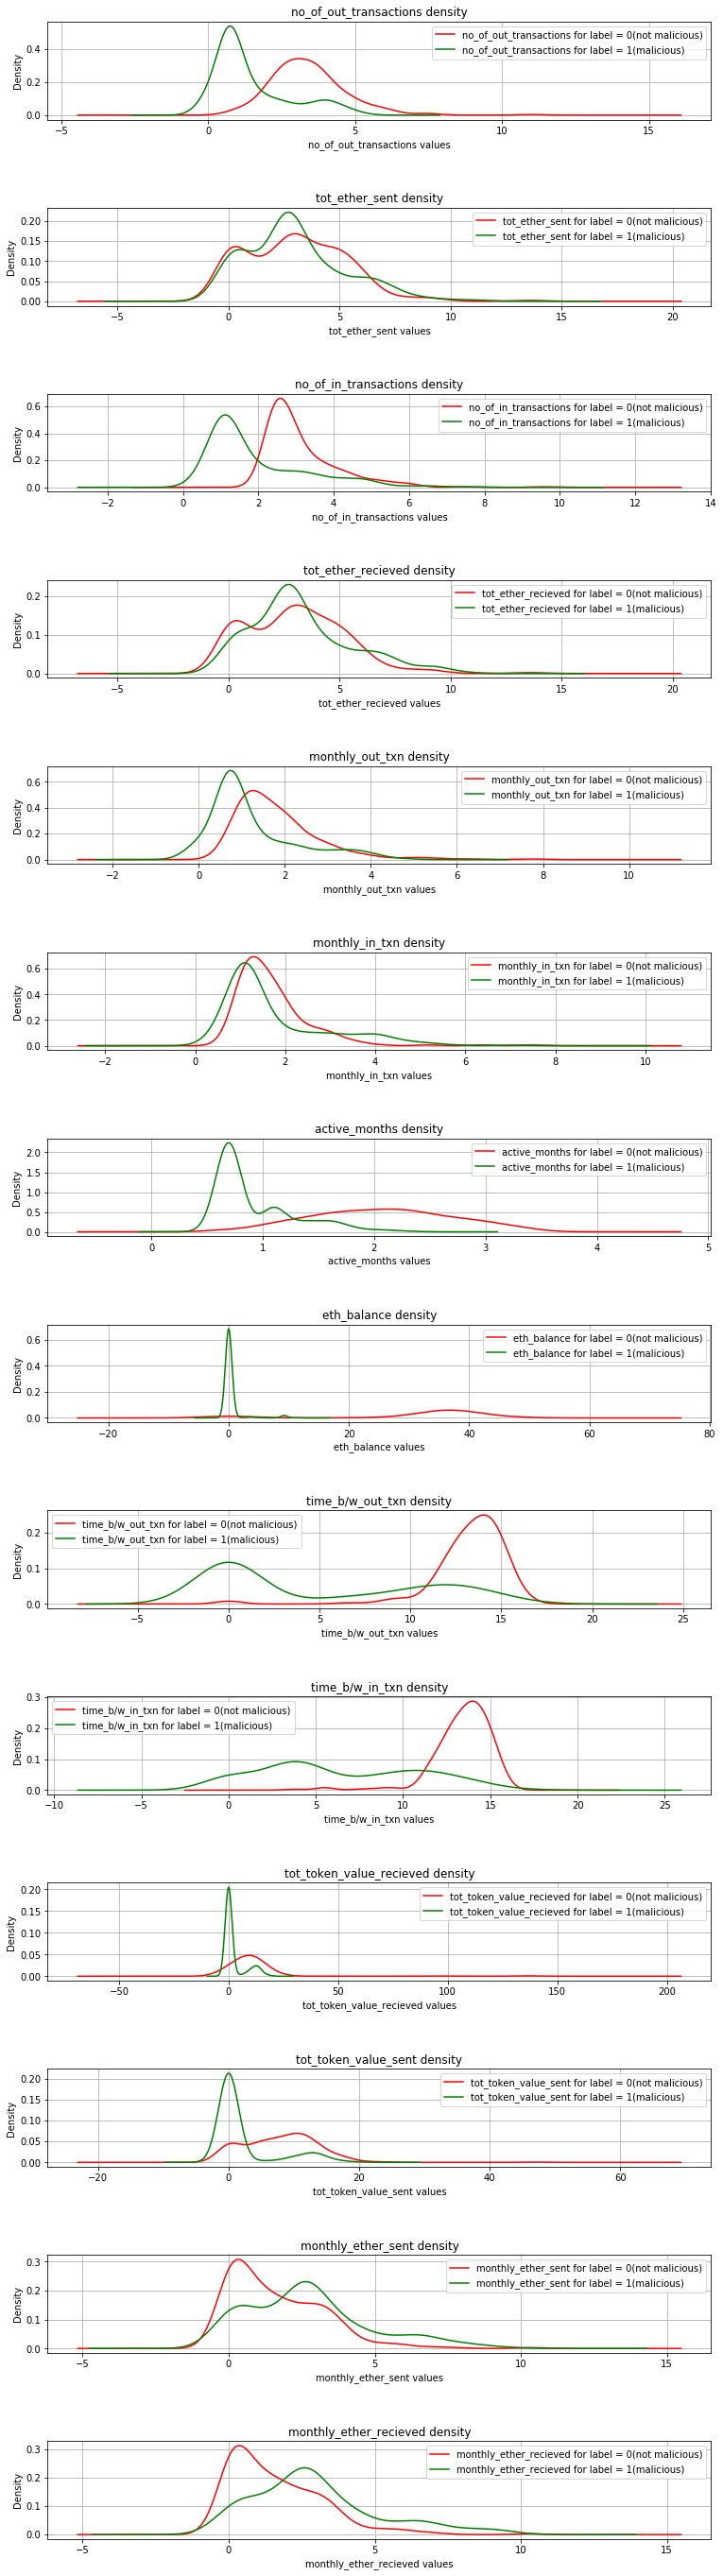

In [ ]:
def plot_densities(data,names):
    '''
    Plot features densities depending on the label values
    '''
    # change fig size to fit all subplots beautifully 
    rcParams['figure.figsize'] = 15, 20

    # separate data based on label values 
    label_0 = data[data['label'] == 0]
    label_1 = data[data['label'] == 1]

    # init figure
    fig, axs = plt.subplots(14, 1)
    
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 1.95,
                        wspace = 0.2, hspace = 0.9)
  
    print('Feature density plot for the labels in the log(data)')
    # plot densities for labels
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        np.log1p(label_0[column_name]).plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + ' for label = 0(not malicious)')
        np.log1p(label_1[column_name]).plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="green", legend=True,
                                     label=column_name + ' for label = 1(malicious)')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
     
    plt.show()
    fig.savefig('densities.png')

names = list(data.columns)
# plot correlation & densities
plot_densities(data,names)

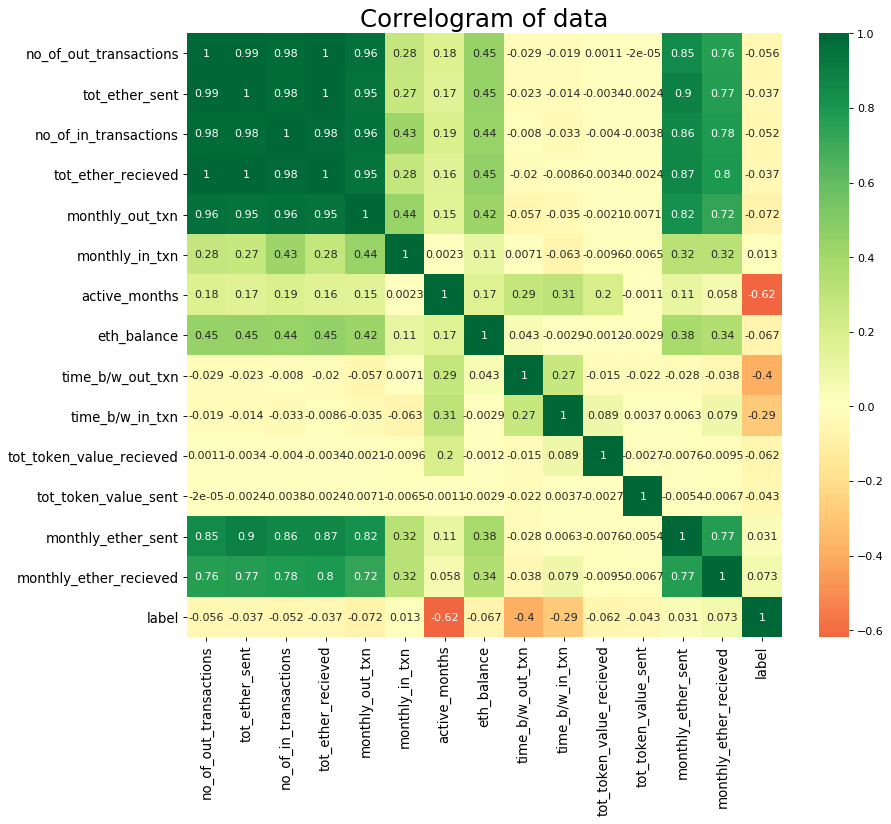

In [ ]:
import seaborn as sns
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

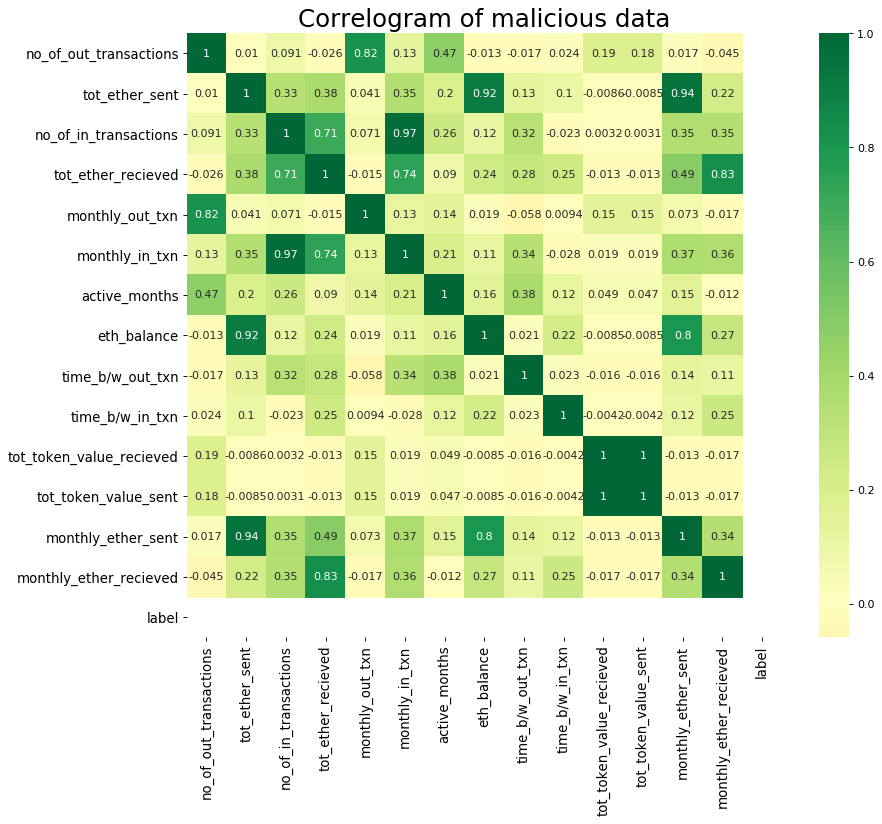

In [ ]:
data = m.loc[:,'no_of_out_transactions':].copy()

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of malicious data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()